In [2]:
# libraries needed to work with tif files
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import cv2
import random
import tensorflow as tf
import torch


In [3]:
df = pd.read_csv('training/training_index.csv')
df.head()


,subsetted_512x512_HLS.S30.T11TQH.2020216.v1.4_merged.tif,subsetted_512x512_HLS.S30.T11TQH.2020216.v1.4.mask.tif
0,subsetted_512x512_HLS.S30.T10TGK.2019280.v1.4_...,subsetted_512x512_HLS.S30.T10TGK.2019280.v1.4....
1,subsetted_512x512_HLS.S30.T11SQC.2020241.v1.4_...,subsetted_512x512_HLS.S30.T11SQC.2020241.v1.4....
2,subsetted_512x512_HLS.S30.T13SEB.2018189.v1.4_...,subsetted_512x512_HLS.S30.T13SEB.2018189.v1.4....
3,subsetted_512x512_HLS.S30.T17SMS.2019094.v1.4_...,subsetted_512x512_HLS.S30.T17SMS.2019094.v1.4....
4,subsetted_512x512_HLS.S30.T11TPH.2020184.v1.4_...,subsetted_512x512_HLS.S30.T11TPH.2020184.v1.4....


In [4]:
df.columns = ['Merged', 'Mask']

In [5]:
df.head()

,Merged,Mask
0,subsetted_512x512_HLS.S30.T10TGK.2019280.v1.4_...,subsetted_512x512_HLS.S30.T10TGK.2019280.v1.4....
1,subsetted_512x512_HLS.S30.T11SQC.2020241.v1.4_...,subsetted_512x512_HLS.S30.T11SQC.2020241.v1.4....
2,subsetted_512x512_HLS.S30.T13SEB.2018189.v1.4_...,subsetted_512x512_HLS.S30.T13SEB.2018189.v1.4....
3,subsetted_512x512_HLS.S30.T17SMS.2019094.v1.4_...,subsetted_512x512_HLS.S30.T17SMS.2019094.v1.4....
4,subsetted_512x512_HLS.S30.T11TPH.2020184.v1.4_...,subsetted_512x512_HLS.S30.T11TPH.2020184.v1.4....


In [6]:
training_Merged = []
training_Mask = []

In [7]:
# append the image names to the list
for i in df['Merged']:
    training_Merged.append(i)
    
for i in df['Mask']:
    training_Mask.append(i)

In [8]:
# Read the images
training_Merged_Images = []
training_Mask_Images = []
# training
for i in training_Merged:
    training_Merged_Images.append(rasterio.open("training/"+i).read())

for i in training_Mask:
    training_Mask_Images.append(rasterio.open("training/"+i).read())

In [9]:
# Knowing size of list
print(len(training_Merged_Images))
print(len(training_Mask_Images))

539
539


In [10]:
# reshape the each image in the ist to 516*516*6
for i in range(len(training_Merged_Images)):
    training_Merged_Images[i] = np.moveaxis(training_Merged_Images[i], 0, -1)
    training_Mask_Images[i] = np.moveaxis(training_Mask_Images[i], 0, -1)


In [11]:
training_Mask_Images[0].shape

(512, 512, 1)

In [12]:
# check values of the mask in the first image
np.unique(training_Mask_Images[0])

array([-1,  0,  1], dtype=int16)

In [13]:
training_Merged_Images[0].shape

(512, 512, 6)

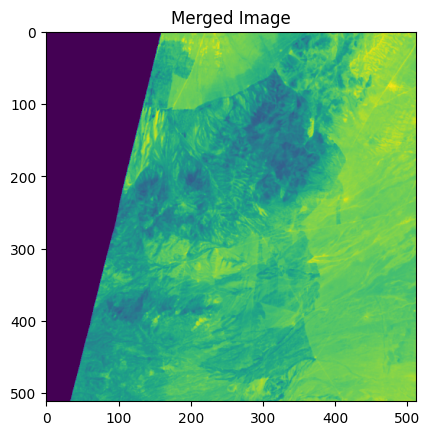

In [14]:
# show the image
plt.imshow(training_Merged_Images[15][:,:,4])
plt.title('Merged Image')
plt.show()

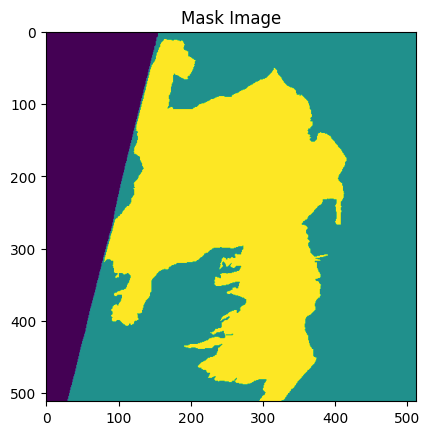

In [15]:
plt.imshow(training_Mask_Images[15][:,:,0])
plt.title('Mask Image')
plt.show()

In [16]:
df_validation = pd.read_csv('validation/validation_index.csv')

In [17]:
df_validation.columns = ['Merged', 'Mask']

In [18]:
df_validation.head()

,Merged,Mask
0,subsetted_512x512_HLS.S30.T14RNV.2018215.v1.4_...,subsetted_512x512_HLS.S30.T14RNV.2018215.v1.4....
1,subsetted_512x512_HLS.S30.T16RGU.2021066.v1.4_...,subsetted_512x512_HLS.S30.T16RGU.2021066.v1.4....
2,subsetted_512x512_HLS.S30.T12RXV.2018182.v1.4_...,subsetted_512x512_HLS.S30.T12RXV.2018182.v1.4....
3,subsetted_512x512_HLS.S30.T16SEB.2021069.v1.4_...,subsetted_512x512_HLS.S30.T16SEB.2021069.v1.4....
4,subsetted_512x512_HLS.S30.T10UGV.2020218.v1.4_...,subsetted_512x512_HLS.S30.T10UGV.2020218.v1.4....


In [19]:
validation_Merged = []
validation_Mask = []

In [20]:
# append the image names to the list
for i in df_validation['Merged']:
    validation_Merged.append(i)

for i in df_validation['Mask']:
    validation_Mask.append(i)

In [21]:
# Read the images
validation_Merged_Images = []
validation_Mask_Images = []

for i in validation_Merged:
    validation_Merged_Images.append(rasterio.open("validation/"+i).read())

for i in validation_Mask:
    validation_Mask_Images.append(rasterio.open("validation/"+i).read())

In [22]:
# Knowing size of list
print(len(validation_Merged_Images))
print(len(validation_Mask_Images))

263
263


In [23]:
# reshape the each image in the ist to 516*516*6
for i in range(len(validation_Merged_Images)):
    validation_Merged_Images[i] = np.moveaxis(validation_Merged_Images[i], 0, -1)
    validation_Mask_Images[i] = np.moveaxis(validation_Mask_Images[i], 0, -1)

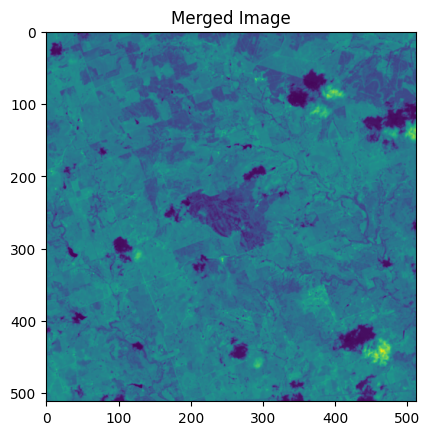

In [24]:
# show the image
plt.imshow(validation_Merged_Images[0][:,:,4])
plt.title('Merged Image')
plt.show()

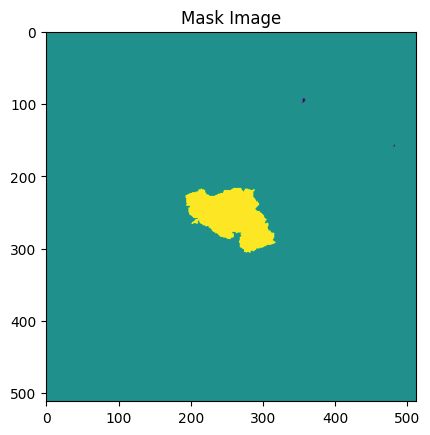

In [25]:
plt.imshow(validation_Mask_Images[0][:,:,0])
plt.title('Mask Image')
plt.show()

In [26]:
# Convert list to X & Y to be used with pytorch
X_train = np.array(training_Merged_Images)
y_train = np.array(training_Mask_Images)

In [27]:
X_train.shape, y_train.shape

((539, 512, 512, 6), (539, 512, 512, 1))

In [28]:
# Convert list to X & Y to be used with pytorch
X_test = np.array(validation_Merged_Images)
y_test = np.array(validation_Mask_Images)

In [29]:
X_test.shape, y_test.shape

((263, 512, 512, 6), (263, 512, 512, 1))

In [30]:
import tensorflow as tf
from keras.layers import Dense, Dropout, LayerNormalization
from keras.layers import Input, Embedding
from keras.models import Model

def MultiHeadSelfAttention(embed_dim, num_heads):
    return tf.keras.layers.MultiHeadAttention(
        key_dim=embed_dim // num_heads, 
        num_heads=num_heads
    )

def FeedForwardNetwork(embed_dim, ff_dim):
    return tf.keras.Sequential([
        Dense(ff_dim, activation='relu'),
        Dense(embed_dim)
    ])

def TransformerEncoder(embed_dim, num_heads, ff_dim, rate=0.1):
    inputs = Input(shape=(None, embed_dim))
    attention = MultiHeadSelfAttention(embed_dim, num_heads)(inputs, inputs)
    attention = Dropout(rate)(attention)
    res = LayerNormalization(epsilon=1e-6)(inputs + attention)
    ff = FeedForwardNetwork(embed_dim, ff_dim)(res)
    ff = Dropout(rate)(ff)
    return Model(inputs=inputs, outputs=LayerNormalization(epsilon=1e-6)(res + ff))

def ViT(image_size, patch_size, num_channels, num_classes, num_layers, embed_dim, num_heads, ff_dim, rate=0.1):
    inputs = Input(shape=(image_size, image_size, num_channels))
    # Patching and Embedding
    patch_size = (image_size // patch_size)
    num_patches = (patch_size ** 2)
    patches = tf.image.extract_patches(inputs, sizes=[1, patch_size, patch_size, 1], strides=[1, patch_size, patch_size, 1], rates=[1, 1, 1, 1], padding='VALID')
    patches = tf.reshape(patches, [-1, num_patches, embed_dim])
    embed = Dense(embed_dim)(patches)
    embed = tf.keras.layers.LayerNormalization(epsilon=1e-6)(embed)

    # Transformer Encoder
    for _ in range(num_layers):
        embed = TransformerEncoder(embed_dim, num_heads, ff_dim, rate)(embed)

    # Classification head
    outputs = Dense(num_classes, activation='softmax')(tf.reduce_mean(embed, axis=1))
    return Model(inputs=inputs, outputs=outputs)

# Parameters for ViT
image_size = 512  # Adjusted for 512x512 image
patch_size = 16
num_channels = 6  # Adjusted for 6 channels in the image
num_classes = 1000
num_layers = 12
embed_dim = 768
num_heads = 12
ff_dim = 3072

# Create ViT model for 512x512x6 image
vit_model_512 = ViT(
    image_size=image_size,
    patch_size=patch_size,
    num_channels=num_channels,
    num_classes=num_classes,
    num_layers=num_layers,
    embed_dim=embed_dim,
    num_heads=num_heads,
    ff_dim=ff_dim
)

# Display model summary
vit_model_512.summary()


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 6)]     0         
                                                                 
 tf.image.extract_patches (T  (None, 16, 16, 6144)     0         
 FOpLambda)                                                      
                                                                 
 tf.reshape (TFOpLambda)     (None, 1024, 768)         0         
                                                                 
 dense (Dense)               (None, 1024, 768)         590592    
                                                                 
 layer_normalization (LayerN  (None, 1024, 768)        1536      
 ormalization)                                                   
                                                                 
 model (Functional)          (None, None, 768)         708

In [31]:
# Compile the model
vit_model_512.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Assuming a classification task
    metrics=['accuracy']
)


In [ ]:
# Define batch size and number of epochs
batch_size = 16
epochs = 10  # Adjust as needed

# Train the model
history = vit_model_512.fit(
    X_train, y_train,  # Training data
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)  # Validation data
)


Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'model_25/model_18/multi_head_attention_17/einsum/Einsum' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 724, in start
      self.io_loop.start()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once
      handle._run()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 408, in dispatch_shell
      await result
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ahmed\AppData\Local\Temp\ipykernel_26568\2363418484.py", line 6, in <module>
      history = vit_model_512.fit(
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\attention\multi_head_attention.py", line 598, in call
      attention_output, attention_scores = self._compute_attention(
    File "c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\attention\multi_head_attention.py", line 527, in _compute_attention
      attention_scores = tf.einsum(self._dot_product_equation, key, query)
Node: 'model_25/model_18/multi_head_attention_17/einsum/Einsum'
OOM when allocating tensor with shape[32,12,1024,1024] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model_25/model_18/multi_head_attention_17/einsum/Einsum}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_68195]